# Exercise 1
Coursera - Machine Learning <br/>
Andrew Ng

## Single Variable

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import itertools
import pandas as pd

### Basic Function

In [110]:
# Create 5 x 5 Identity Matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Plotting

In [111]:
# Convert .txt database file into .csv file
# On second thought I don't think it's needed
# Alternative for opening file
# with open('ex1data1.txt', 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split(",") for line in stripped if line)
#     with open('ex1data1.csv','w') as out_file:
#               writer = csv.writer(out_file)
#               writer.writerow(('x', 'y'))
#               writer.writerows(lines)


In [164]:
# Reading the CSV into a pandas DataFrame

df = pd.read_csv('ex1data1.txt', header = None, sep = ',')
print(df)

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


In [113]:
print(df)

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


In [114]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]
print(X)
print("\n")
print(y)

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: 0, Length: 97, dtype: float64


0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 1, Length: 97, dtype: float64


In [115]:
def plotData(x, y):
    font = {'size' : 20}
    plt.figure(figsize=(15, 8), dpi=50, facecolor='w')
    plt.scatter(x, y, color='red', marker='x', s=144)
    plt.rc('font', **font)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000')
    plt.axis([4, 25, -5, 25])
    plt.show()

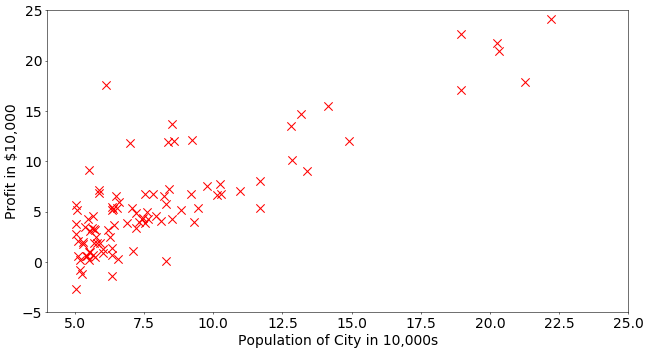

In [116]:
plotData(X, y)

### Cost and Gradient Descent

In [117]:
# number of dataset
m = len(y)
m

97

In [118]:
# When dealing with matrix array operation it's better to have rank of two or ndim = 2, thus
X = X[:, np.newaxis]
y = y[:, np.newaxis]

In [119]:
X.ndim

2

In [120]:
X.shape

(97, 1)

In [121]:
# Adding intercept term (bias) to array X
ones = np.ones([m, 1])
X = np.hstack([ones, X])

In [122]:
# Define alpha value (learning rate) and max iteration
a = 0.001
iteration = 1500

In [123]:
# Prepare matrix to hold theta values
theta = np.zeros([2, 1])
theta

array([[0.],
       [0.]])

### Cost Function
<img src = "..\img\cost-funct-basic.PNG">
<!-- ![](cost-funct-basic.png) -->

In [124]:
# Define computeCost function
def computeCost(X, y, theta):
    const = 1/(2*m)
    temp = np.matmul(X, theta) - y
    J = const * np.sum(np.power(temp,2))
    return J

In [16]:
# Note:
# np.sum perform better when calculating array
# 

In [139]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [18]:
# Calculate computeCost with theta [0; 0]
J1 = computeCost(X, y, theta)
print("With theta = [0 ; 0], \nCost computed = %.2f " %J1)

With theta = [0 ; 0], 
Cost computed = 32.07 


In [142]:
# Calculate computeCost with theta [-1; 2]
theta1 = np.array([-1, 2])
theta1 = theta1[:, np.newaxis]
J2 = computeCost(X, y, theta1)
print("With theta [-1, 2], \n Cost computed: %.2f" %J2) 

With theta [-1, 2], 
 Cost computed: 54.24


### Gradient Descent
<img src = ../img/grad-descent-basic.png>

In [143]:
# Variable for gradient descent
# Learning rate and iteration
alpha = 0.01
iteration = 1500

In [144]:
theta = np.zeros([2, 1])
def gradientDescent(X, y, theta, alpha):
    J_hist = np.zeros([iteration, 1])
    for t in range(iteration):
        temp = (np.dot(X, theta) - y)
        temp = np.dot(X.T, temp)
        temp = alpha/m * temp
        
        
        
        theta = theta - temp
        J_hist[t] = computeCost(X, y, theta)
    return theta, J_hist

In [22]:
theta, J_hist = gradientDescent(X, y, theta, alpha)

In [23]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [24]:
J_hist

array([[6.73719046],
       [5.93159357],
       [5.90115471],
       ...,
       [4.48343473],
       [4.48341145],
       [4.48338826]])

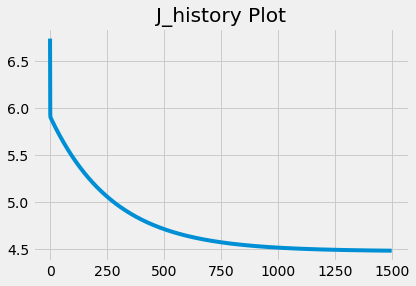

In [25]:
# Checks to see whether J_hist decrease each iteration
plt.style.use('fivethirtyeight')
plt.title("J_history Plot")
plt.plot(J_hist)

### Plotting Linear Regression

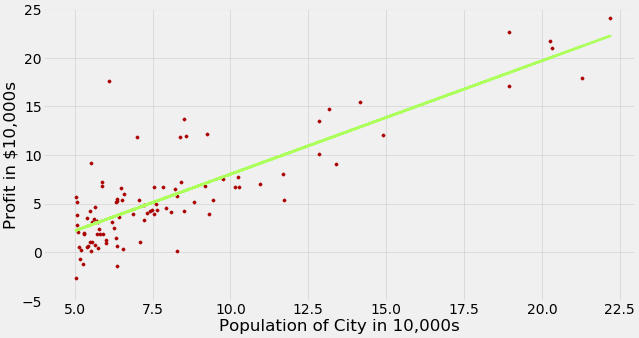

In [26]:
# Plot the linear fit
plt.figure(figsize=(17, 9), dpi=40)
font = {'size' : 25}
plt.rc('font', **font)
plt.scatter(X[:, [1]], y, color = '#aa0000')
plt.plot(X[:, [1]], np.dot(X, theta), color = '#adff5d')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.axis([4, 23, -5, 25])
plt.show()

In [27]:
# Predict values for population sizes of 35,000 and 70,000
theta_pred1 = np.array([1, 3.5])
predict1 = np.dot(theta_pred1, theta)
print("For population = 35,000, we predict a profit of %.5f" %(predict1*10000))

For population = 35,000, we predict a profit of 4519.76787


In [28]:
# Predict values for population sizes of 35,000 and 70,000
theta_pred2 = np.array([1, 7])
predict2 = np.dot(theta_pred2, theta)
print("For population = 70,000, we predict a profit of %.5f" %(predict2*10000))

For population = 70,000, we predict a profit of 45342.45013


### Visualizing J (θ)

In [29]:
# Save it for later let's try multivariate first

## Multiple Variable

### Feature Normalization

In [141]:
# Load data
df = pd.read_csv("ex1data2.txt", header=None, sep=",")
print(df)

       0  1       2
0   2104  3  399900
1   1600  3  329900
2   2400  3  369000
3   1416  2  232000
4   3000  4  539900
5   1985  4  299900
6   1534  3  314900
7   1427  3  198999
8   1380  3  212000
9   1494  3  242500
10  1940  4  239999
11  2000  3  347000
12  1890  3  329999
13  4478  5  699900
14  1268  3  259900
15  2300  4  449900
16  1320  2  299900
17  1236  3  199900
18  2609  4  499998
19  3031  4  599000
20  1767  3  252900
21  1888  2  255000
22  1604  3  242900
23  1962  4  259900
24  3890  3  573900
25  1100  3  249900
26  1458  3  464500
27  2526  3  469000
28  2200  3  475000
29  2637  3  299900
30  1839  2  349900
31  1000  1  169900
32  2040  4  314900
33  3137  3  579900
34  1811  4  285900
35  1437  3  249900
36  1239  3  229900
37  2132  4  345000
38  4215  4  549000
39  2162  4  287000
40  1664  2  368500
41  2238  3  329900
42  2567  4  314000
43  1200  3  299000
44   852  2  179900
45  1852  4  299900
46  1203  3  239500


In [142]:
type(df)

pandas.core.frame.DataFrame

In [143]:
X = df.iloc[:, 0]

In [144]:
type(X)

pandas.core.series.Series

In [145]:
X = df.iloc[:,0:2].to_numpy()
y = df.iloc[:, 2].to_numpy()
y = y[:, np.newaxis]
print(X)
print("\n")
print(y)

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]


[[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]
 [239999]
 [347000]
 [329999]
 [699900]
 [259900]
 [449900]
 [299900]
 [199900]
 [499998]
 [599000]
 [252900]
 [255000]
 [242900]
 [259900]
 [573900]
 [249900]
 [464500]
 [469000]
 [475000]
 [299900]
 [349900]
 [169900]
 [314900]
 [579900]
 [285900]
 [249900]
 [229900]
 [345000]
 [5490

In [146]:
def featureNormalize(X):
    m, n = X.shape
#     X_mean = np.zeros([m, 2])
    X_mean = []
    X_std = []
    for i in range(n):
        X_mean.append(np.mean(X[:, i]))
        X_std.append(np.std(X[:, i], ddof=1))
    
    X = (X - X_mean)/X_std
    
    return X

In [147]:
X_norm = featureNormalize(X)

In [148]:
X_norm

array([[ 1.30009869e-01, -2.23675187e-01],
       [-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.

In [149]:
len(X_norm)

47

In [150]:
# Adding intercept/biar term (matrix of ones) to newly normalized X
ones = np.ones([len(X_norm), 1])
X_norm = np.hstack([ones, X_norm])

In [151]:
X_norm

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

In [152]:
type(X)

numpy.ndarray

In [153]:
# Initialize new 3x1 theta matrix for X_norm
theta = np.zeros([3, 1])

### Gradient Descent Multiple Variables

In [154]:
# First to calculate J_history, computeCostMulti is necessary
def computeCostMulti(X, y, theta):
    m, n = X.shape
    temp1 = np.dot(X_norm, theta)-y
    J = 1/(2*m) * np.sum(np.power(temp1, 2))
    return J 

In [155]:
J_multi_test = computeCostMulti(X_norm, y, theta)

In [156]:
J_multi_test

65591548106.45744

In [157]:
# Define alpha and iteration value for gradient descent
alpha = 0.01
num_iters = 400

In [158]:
# Now define gradientDescentMulti
theta = np.zeros([3, 1])
def gradDescentMulti(X, y, theta, alpha, iteration):
    m, n = X.shape # m, number of dataset and n, number of features of X_norm
    J_hist = np.zeros([iteration, 1])
    for t in range(num_iters):
        temp = (np.dot(X, theta) - y)
        temp = np.dot(X.T, temp)
        temp = alpha/m * temp
        theta = theta - temp
        J_hist[t] = computeCostMulti(X, y, theta)
    return theta, J_hist

In [159]:
theta, J_hist = gradDescentMulti(X_norm, y, theta, alpha, num_iters)

In [160]:
J_hist

array([[6.43007496e+10],
       [6.30367950e+10],
       [6.17991118e+10],
       [6.05871404e+10],
       [5.94003332e+10],
       [5.82381546e+10],
       [5.71000810e+10],
       [5.59856000e+10],
       [5.48942105e+10],
       [5.38254223e+10],
       [5.27787561e+10],
       [5.17537429e+10],
       [5.07499240e+10],
       [4.97668505e+10],
       [4.88040836e+10],
       [4.78611938e+10],
       [4.69377610e+10],
       [4.60333743e+10],
       [4.51476316e+10],
       [4.42801397e+10],
       [4.34305137e+10],
       [4.25983772e+10],
       [4.17833619e+10],
       [4.09851074e+10],
       [4.02032613e+10],
       [3.94374785e+10],
       [3.86874216e+10],
       [3.79527603e+10],
       [3.72331717e+10],
       [3.65283394e+10],
       [3.58379543e+10],
       [3.51617135e+10],
       [3.44993210e+10],
       [3.38504869e+10],
       [3.32149275e+10],
       [3.25923655e+10],
       [3.19825292e+10],
       [3.13851529e+10],
       [3.07999764e+10],
       [3.02267454e+10],


In [161]:
theta

array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])

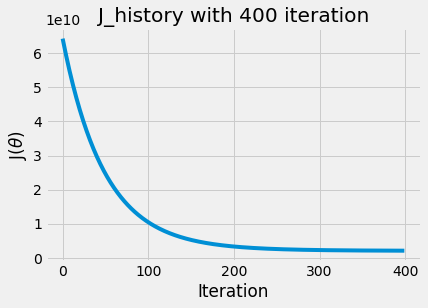

In [162]:
# Plot J history for multiple variables
plt.style.use('fivethirtyeight')

plt.plot(range(num_iters), J_hist)
plt.xlabel("Iteration")
plt.ylabel(r'J($\theta$)')
plt.title("J_history with 400 iteration")
plt.show()

In [163]:
J_hist.shape

(400, 1)

In [173]:
print('Theta computed from gradient descent multiple features with learning rate of %.3f:' %alpha)
np.printoptions(precision=3, suppress=True)
print(theta)

Theta computed from gradient descent multiple features with learning rate of 0.010:
[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


In [167]:
# Estimate the house with 1650 sq-ft and 3 br
# Theta0*1 + Theta1*1650 + Theta2*3
housefeat = np.array([[1, 1650, 3]]).reshape(3, 1)
price = np.dot(np.transpose(theta), housefeat)
price

array([[1.65489064e+08]])

In [168]:
house_price = price.item()
house_price

165489064.11899266

In [169]:
# Then the estimated house price with 1650-sq ft and 3 br is
print('Estimated house price: %.3f' %house_price)

Estimated house price: 165489064.119


### Normal Equations

In [47]:
df = pd.read_csv('ex1data2.txt', header = None, sep = ',')

In [59]:
X = df.iloc[:, 0:2].to_numpy()
y = df.iloc[:, 2].to_numpy()

In [12]:
X

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4
5,1985,4
6,1534,3
7,1427,3
8,1380,3
9,1494,3


In [13]:
y

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: 2, dtype: int64

In [60]:
type(X)

numpy.ndarray

In [57]:
# Add intercept/bias term to matrix of X
ones = np.ones([X.shape[0], 1])
X = [ones, X]

In [61]:
type(ones)

numpy.ndarray

In [62]:
type(X)

numpy.ndarray

In [64]:
X = np.hstack([ones, X])
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

In [72]:
def normalEqn(X, y):
    X_t = X.transpose()
    temp = np.dot(X_t, X)
    theta = np.dot(np.dot(np.linalg.pinv(temp), X_t), y)
    return theta
#     theta = pinv((X' * X)) * X' * y;
    

In [118]:
# Calclate theta using normal equation and convert it into 2 dimension using ndmin
theta = normalEqn(X, y)
theta = np.array(theta, ndmin = 2)
theta

array([[89597.90954355,   139.21067402, -8738.01911255]])

In [119]:
theta.shape

(1, 3)

In [120]:
print('Theta obtained from the normal equation are', theta)

Theta obtained from the normal equation are [[89597.90954355   139.21067402 -8738.01911255]]


In [127]:
# Estimate the house with 1650 sq-ft and 3 br
# Theta0*1 + Theta1*1650 + Theta2*3
housefeat = np.array([[1, 1650, 3]]).reshape(3, 1)
price = np.dot(theta, housefeat)
price

array([[293081.46433497]])

In [130]:
house_price = price.item()
house_price

293081.4643349717

In [131]:
# Then the estimated house price with 1650-sq ft and 3 br is
print('Estimated house price: %.3f' %house_price)

Estimated house price: 293081.464
